In [5]:
#COMENZAMOS IMPORTANDO LAS LIBRERIAS NECESARIAS PARA EL COMIENZO (LUEGO SE AGREGARAN OTRAS SEGUN SE NECESITE)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
#Cargamos el Dataset
dfn=pd.read_excel("Datos_totales.xlsx")
dfn.head(20)

,Unnamed: 0,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion
0,0,101,210,35,35,56,1600,2021,257.7
1,1,101,462,50,50,70,1400,1988,199.6
2,2,101,462,50,50,40,800,1989,180.5
3,3,101,469,150,130,190,1462,1988,199.6
4,4,101,469,120,120,168,1400,1989,180.5
5,5,101,686,200,200,300,1500,1988,199.6
6,6,101,686,100,100,80,800,1989,180.5
7,7,101,686,300,300,480,1600,1995,197.1
8,8,101,686,200,200,360,1800,1996,393.5
9,9,101,686,200,200,400,2000,1997,283.5


In [5]:
#Borramos la columna "Unnamed"
dfn = dfn.drop("Unnamed: 0", axis=1)
dfn

,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion
0,101,210,35,35,56,1600,2021,257.7
1,101,462,50,50,70,1400,1988,199.6
2,101,462,50,50,40,800,1989,180.5
3,101,469,150,130,190,1462,1988,199.6
4,101,469,120,120,168,1400,1989,180.5
...,...,...,...,...,...,...,...,...
3379,129,833,105070,105070,514843,4900,2017,419.1
3380,129,833,89875,80875,339453,4197,2018,440.8
3381,129,833,119000,119000,393100,3303,2019,395.4
3382,129,833,131000,131000,570000,4351,2020,503.3


In [6]:
#Definimos nuestra variable objetivo y separamos el Dataset para el entrenamiento
X = dfn.drop("Rendimiento", axis=1)
y=dfn.Rendimiento




In [7]:
#importamos el train test split y separamos el dataset para entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

C:\Users\Diego\miniconda3\envs\Mientorno\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Diego\miniconda3\envs\Mientorno\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Diego\miniconda3\envs\Mientorno\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, Futur

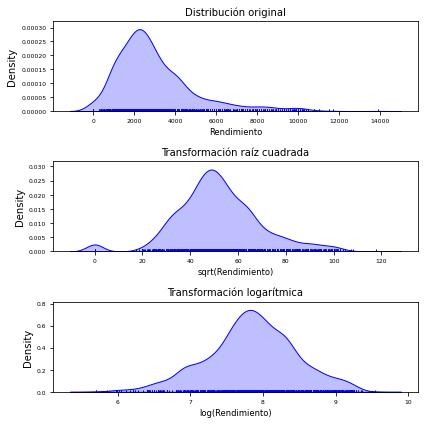

In [8]:
#Vemos la distribucion de nuestra variable objetivo.
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    dfn.Rendimiento,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Rendimiento', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(dfn.Rendimiento),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Rendimiento)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(dfn.Rendimiento),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(Rendimiento)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

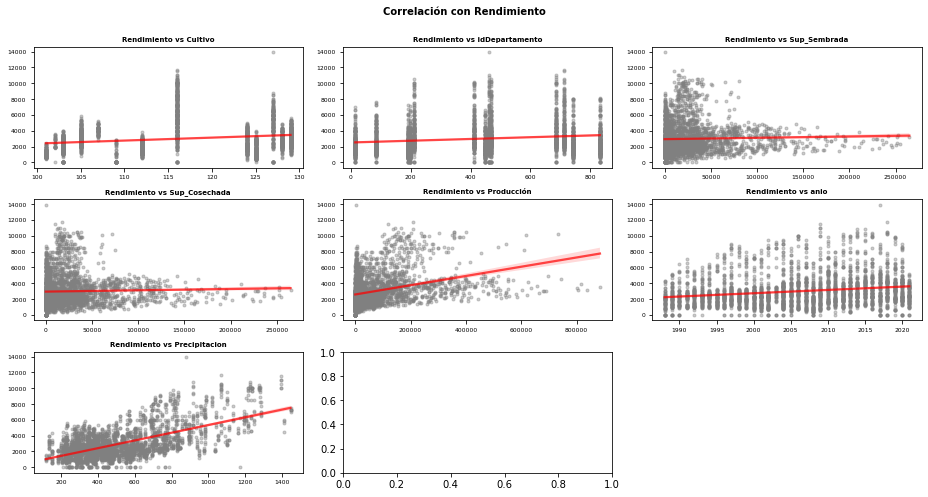

In [9]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 7))
axes = axes.flat
columnas_numeric = dfn.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Rendimiento')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = dfn[colum],
        y           = dfn['Rendimiento'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Rendimiento vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter
    axes[i].xaxis.set_major_formatter
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Rendimiento', fontsize = 10, fontweight = "bold");

In [10]:
#comenzamos utilizando un modelo de regresion lineal
import time
inicio = time.time()
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
fin = time.time()
print(fin-inicio)

0.42491745948791504


In [11]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([3983.02784215, 3761.61941507, 2514.49764019, ..., 4293.80630092,
       2282.29657192, 2778.04498848])

In [12]:
#Armamos un Df comparativo
comp=pd.DataFrame({"real": y_test, "preds":y_pred})
comp

,real,preds
569,2800,3983.027842
3340,3584,3761.619415
1850,2100,2514.497640
1412,4200,4251.029516
2202,1851,1897.669536
...,...,...
2347,1200,-1073.251137
1588,1000,2342.336752
2521,4500,4293.806301
154,3100,2282.296572


Calculamos el R2 (utilizaremos esta medida para ver el grado de error)
El coeficiente de determinación, o R² está estrechamente relacionada con la MSE,tiene la ventaja de estar libre de escala
R2=1-(MSE(modelo)/MSE(baseline))

Tambien calcularemos el MAE, Esta métrica de regresión es el valor medio de la diferencia absoluta entre el valor real y el valor predicho.


In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
r2= r2_score(y_test,y_pred)
r2



0.5692360295452686

In [15]:
MAE= mean_absolute_error(y_test,y_pred)
MAE

956.6075301946563

Ahora probaremos otros modelos y compararemos

In [16]:
#Probamos el Decision tree Regressor

inicio = time.time()
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(random_state=1)
model2.fit(X_train, y_train)
fin = time.time()
print(fin-inicio)

0.7362194061279297


In [17]:
y_pred2=model2.predict(X_test)
comp2=pd.DataFrame({"real": y_test, "pred":y_pred2})
comp2

,real,pred
569,2800,2300.0
3340,3584,4300.0
1850,2100,2500.0
1412,4200,3800.0
2202,1851,1901.0
...,...,...
2347,1200,1767.0
1588,1000,1000.0
2521,4500,5000.0
154,3100,2500.0


In [18]:
r2= r2_score(y_test,y_pred2)
r2

0.8760844227425268

In [19]:
MAE= mean_absolute_error(y_test,y_pred2)
MAE

413.81003937007875

In [20]:
#Probaremos el Random Forest Regressor

inicio = time.time()
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor(random_state=1)
model3.fit(X_train, y_train)
fin = time.time()
print(fin-inicio)

1.1751008033752441


In [21]:
y_pred3=model3.predict(X_test)
comp3=pd.DataFrame({"real": y_test, "pred":y_pred3})
comp3

,real,pred
569,2800,2639.30
3340,3584,3879.00
1850,2100,2324.65
1412,4200,3994.67
2202,1851,1860.05
...,...,...
2347,1200,1688.60
1588,1000,991.06
2521,4500,5062.09
154,3100,2634.00


In [22]:
r2= r2_score(y_test,y_pred3)
r2

0.9385249085840909

In [23]:
MAE= mean_absolute_error(y_test,y_pred3)
MAE

287.58753937007873

In [24]:

inicio = time.time()
from sklearn import svm
svm_reg= svm.SVR()
regressor=svm_reg.fit(X_train, y_train)
y_pred4=regressor.predict(X_test)
fin = time.time()
print(fin-inicio)

0.5402779579162598


In [25]:
comp4=pd.DataFrame({"real": y_test, "pred":y_pred4})
comp4.sample(10)

,real,pred
1238,6000,2495.390902
1255,1799,2554.509855
3237,3235,2796.453051
1120,5200,2492.888260
965,4450,2822.402981
181,2400,2492.304176
1787,2000,2512.268630
231,2000,2495.274152
230,1400,2492.935710
2454,5500,2608.536993


In [26]:
r2= r2_score(y_test,y_pred4)
r2

0.00829438521136816

In [27]:
MAE= mean_absolute_error(y_test,y_pred4)
MAE

1278.7359151975875

In [28]:
inicio = time.time()
from sklearn.neighbors import KNeighborsRegressor
KNN_reg=KNeighborsRegressor(n_neighbors=5)
regressor=KNN_reg.fit(X_train, y_train)
y_pred5=regressor.predict(X_test)
fin = time.time()
print(fin-inicio)

0.0722360610961914


In [29]:
comp5=pd.DataFrame({"real": y_test, "pred":y_pred5})
comp5.sample(10)

,real,pred
630,2908,2674.4
154,3100,3255.6
3140,2600,2420.0
2285,1600,1604.2
2037,3600,3641.8
1074,2870,2856.6
3203,5300,5060.2
573,2200,2294.0
3,1462,1340.0
1178,6000,4800.0


In [30]:
r2= r2_score(y_test,y_pred5)
r2

0.9429521773711178

In [31]:
MAE= mean_absolute_error(y_test,y_pred5)
MAE

254.28405511811022

In [32]:
#Probamos algunas tecnicas de Stacking (Ensamblar mas de 1 modelo para mejorar un resultado)
#Definimos que modelos vamos a combinar
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor(random_state=1)

In [33]:
# Store the models to combine (esto lo pongo porque lo vi en la notebook de Miguel)
estimators = [("Linear Regression", lr), ("KNN", knn), ("Random Forest", rf)]

In [34]:
#importamos la tecnica de ensamble
from sklearn.ensemble import StackingRegressor

In [37]:
#Define the super model whit a meta-stimator which is just another linear regression
inicio = time.time()
ensemble= StackingRegressor(estimators=estimators, final_estimator=lr)
#entrenamos el super-modelo
ensemble.fit(X_train, y_train)
fin = time.time()
print(fin-inicio)

3.7816903591156006


In [38]:
#entrenamos el super-modelo
ensemble.fit(X_train, y_train)


StackingRegressor(estimators=[('Linear Regression', LinearRegression()),
                              ('KNN', KNeighborsRegressor()),
                              ('Random Forest',
                               RandomForestRegressor(random_state=1))],
                  final_estimator=LinearRegression())

In [39]:
#evaluamos el super-modelo
y_pred_ens=ensemble.predict(X_test)

In [40]:
#vemos algunos resultados
comp_ens=pd.DataFrame({"real": y_test, "pred":y_pred_ens})
comp_ens.sample(10)

,real,pred
1947,2500,2506.722863
2276,1500,1606.155773
1294,2956,3010.872832
1760,2500,2433.413909
136,1400,1142.013627
1818,1700,2017.594583
870,3800,4024.467178
7,1600,1525.937913
3101,3500,3670.271749
1611,1000,885.619452


In [41]:
#calculamos nuestro R2 del super-modelo
r2= r2_score(y_test,y_pred_ens)
r2

0.9617729521609623

In [42]:
MAE= mean_absolute_error(y_test,y_pred_ens)
MAE

225.81021488624876

In [38]:
#Se logro una mejora importante


In [43]:
from sklearn import model_selection
from sklearn.metrics import r2_score

In [44]:
#ahora probamos un K-Cross validation para ver si el modelo responde de la misma manera siempre
models = []
models.append(('lr', LinearRegression()))
models.append(('knn' , KNeighborsRegressor(n_neighbors=5)))
models.append(('rf' , RandomForestRegressor(random_state=1)))
models.append(('ensemble', StackingRegressor(estimators=estimators, final_estimator=lr)))
print(models)

[('lr', LinearRegression()), ('knn', KNeighborsRegressor()), ('rf', RandomForestRegressor(random_state=1)), ('ensemble', StackingRegressor(estimators=[('Linear Regression', LinearRegression()),
                              ('KNN', KNeighborsRegressor()),
                              ('Random Forest',
                               RandomForestRegressor(random_state=1))],
                  final_estimator=LinearRegression()))]


In [45]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=6, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

lr: 0.602194 (0.033904)
knn: 0.925834 (0.023977)
rf: 0.928368 (0.021614)
ensemble: 0.950300 (0.017024)


In [46]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=6, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

lr: -940.907836 (40.218469)
knn: -286.319414 (33.575917)
rf: -302.895812 (21.768300)
ensemble: -242.176284 (17.323367)


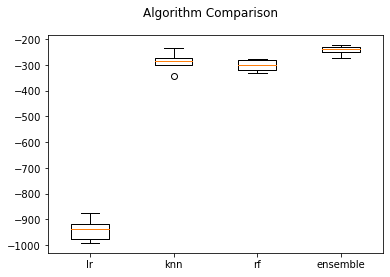

In [48]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [2]:
r_LN = ['LN' ,0.42   ,  0.5692  ,  956.60]
r_DTR = ['DTR', 0.73  ,  0.8760  ,  413.81]
r_RFR = ['RFR',1.17  ,  0.9385  ,  287.58]
r_SVM = ['SVM',0.54  ,  0.0082  , 1278.73]
r_KNN = ['KNN',0.072 ,  0.9429  ,  254.28]
r_ESM = ['ESM',3.78  ,  0.9617  ,  225.81]

In [3]:
lista_rrss = [r_LN,r_DTR,r_RFR,r_SVM,r_KNN,r_ESM]

In [6]:
df_rrss = pd.DataFrame(lista_rrss,columns= ['method','time', 'R2','MAE'])
df_rrss
df_rrss.to_csv("df_rrss.csv")

Text(0, 0.5, 'Time (s)')

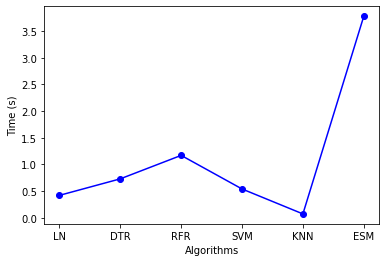

In [57]:
plt.plot(df_rrss.method, df_rrss.time, 'b-', marker='o')
plt.xlabel('Algorithms')
plt.ylabel("Time (s)")

Text(0, 0.5, 'MAE')

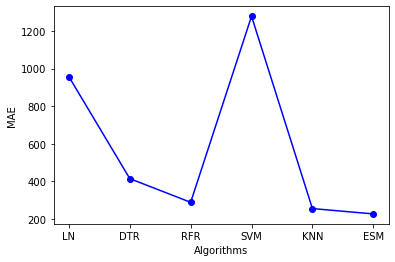

In [58]:
plt.plot(df_rrss.method, df_rrss.MAE, 'b-', marker='o')
plt.xlabel('Algorithms')
plt.ylabel("MAE")